In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fashionmnist:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2243%2F9243%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T070730Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D024aa4879d061a9e2292376c3c701a9b31b0ae1af2c4b03f43a8f366008edbd7747a0a02c25680d1b67942c5cb87f284f26c00dffca11dfef1ee9e538d9cdfa200a66ae0d77be0dadaff2c9d13f1620b6101e082f00521d5ff2a59204543af1e31d71c6236ce6799edf3f34964e002724eae129609133c1cae9236fffce24c3b5136225bb684c6fc73d263b34fdb013f2e4daf83f0025e8b4a4b25aac624b1bb678f405a17862db5657382b47043e0efb75a5333b622a0c1a7c7a6eee0b9fcd4a7510dd7596794463d1c87d5d5f43a81a6aebb79128dc7e191797be08bc07f651ddda6351cc6b394fb227c5e15ad15f1fd44616009f031d2b542c5c5aeb68a20,machine-learning-architecture-diagrams:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3438321%2F6157637%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T070730Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5da007ccb93a798fbcf0aabff8cc8210f7fa46bc31cd0865b0e8b66352b1e68428bb3279ddb37d74aa128ea41da5b857cc5984caf4b1a5e1f234bc49ce2f6220c3bef4bba5dc6a53ea281f5df53ddb4eccfcfe21382603f877a800b120b82ca120c595dd136b57667e34b2c91d682ba692f00bb3369522c2f2119698fc02f4671949c29751f1137cd56550d29f8cac08bb1d5acde3defd424f23741e392b81102279bcf3219df60086f4b509da6f680adf49ba9c9aba5f2f8abdc1f762a2cc87594fca02240accb5e1fb2af82c995c04a211e425054597cf6e30a82ae707ac30926c6fca3aadb65a61093532e92bf69c0dc9492584c6d250ead22b403019162b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 72114846 bytes downloaded
Downloaded and uncompressed: fashionmnist
[==================================================] 136733 bytes downloaded
Downloaded and uncompressed: machine-learning-architecture-diagrams
Data source import complete.


<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Conditional GAN </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Architecture Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px">
The Conditional Generative Adversarial Network (CGAN) consists of two main components: the Generator and the Discriminator.<br><br>
1. Generator:<br><br>
   - The Generator takes two inputs: "Noise (z)" and "Conditional Input (c)." The noise input is a random vector that serves as a source of randomness, while the conditional input provides additional information to guide the generation process.<br>
   - The noise input and the conditional input are passed through fully connected layers, which are mathematical operations that transform the inputs into a higher-dimensional representation.<br>
   - The transformed inputs go through more fully connected layers to further refine the generated output.<br>
   - Finally, the output is generated as the "Generated Sample (x)," which represents an image or data point created by the Generator.<br>
<br>
2. Discriminator:<br><br>
   - The Discriminator takes two inputs: "Input Sample (x)" and "Conditional Input (c)." The input sample is an actual image or data point, while the conditional input provides context for the Discriminator's evaluation.<br>
   - Similar to the Generator, the inputs are processed through fully connected layers to extract meaningful features.<br>
   - The transformed inputs are further processed through additional fully connected layers to capture more complex patterns and details.<br>
   - The output of the Discriminator is the "Probability (Real or Fake)," which represents the likelihood that the input sample is real (from the true dataset) or fake (generated by the Generator).<br><br>
3. Training Process:<br><br>
   - The Generator and Discriminator are trained in a competitive manner.<br>
   - During training, the Generator tries to generate realistic samples that can fool the Discriminator into classifying them as real.<br>
   - The Discriminator, on the other hand, aims to accurately distinguish between real and fake samples.<br>
   - This adversarial training process leads to the refinement of both the Generator and Discriminator, where the Generator becomes more adept at generating realistic samples, while the Discriminator becomes more skilled at distinguishing between real and fake samples.<br>
   - The overall goal is for the Generator to generate samples that are indistinguishable from real samples, fooling the Discriminator into accepting them as authentic.<br>
<br>
The Conditional GAN architecture allows the generation of specific samples based on the conditional input, enabling control over the generated outputs. By providing different conditional inputs, you can influence the Generator to generate samples with specific attributes or characteristics, making the CGAN a powerful tool for conditional data generation and manipulation.</div>

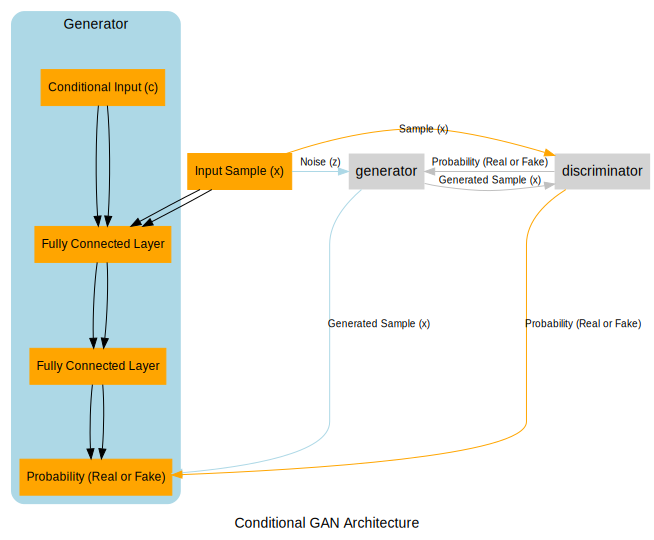

In [2]:
from IPython.display import SVG, display
svg_file = '/kaggle/input/machine-learning-architecture-diagrams/CGAN.svg'
display(SVG(filename=svg_file))


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Importing modules
    </div>


In [3]:
from torch import optim
import os
import torchvision.utils as utils
import numpy as numpy
from torchvision import  datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Downloading MNIST dataset and instantiating dataset    </div>


In [4]:
dataset_path = os.path.join('./data', 'FashionMNIST')
os.makedirs(dataset_path, exist_ok=True)
model_path = os.path.join('./model', 'FashionMNIST')
os.makedirs(model_path,exist_ok=True)
samples_path = os.path.join('./samples','FashionMNIST')
os.makedirs(samples_path,exist_ok=True)

#defining the transform
transform = transforms.Compose([transforms.Resize([32,32]),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5],[0.5])])

dataset = datasets.FashionMNIST(dataset_path, train=True, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:01<00:00, 15258883.76it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270043.33it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5086998.78it/s]


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17597617.76it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw




<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Creating dataloader    </div>


In [5]:
train_loader = DataLoader(dataset=dataset, batch_size=256, shuffle=True, num_workers=4, drop_last=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
performing sanity check of the dataloader    </div>


In [6]:
for batch in train_loader:
    print(batch)
    break

[tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.00


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Convolutional block    </div>


In [7]:
def convolution_block(in_channels,out_channels, kernel=4,stride=2, pad=1,bias=False, transpose=False):
    module= []
    if transpose:
        module.append(nn.ConvTranspose2d(in_channels,out_channels,kernel,stride, pad, bias=bias))
    else:
        module.append(nn.Conv2d(in_channels,out_channels,kernel,stride,pad,bias=bias))
    if bias == False:
        #use batch norm
        module.append(nn.BatchNorm2d(out_channels))

    return nn.Sequential(*module)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Defining generator model    </div>


In [8]:
class Generator(nn.Module):
    def __init__(self,z_dim=10, num_classes=10, label_embed_size=5, channels=3, conv_dim=64):
        super().__init__()
        self.label_embedding = nn.Embedding(num_classes, label_embed_size)
        self.transpose_conv1 =convolution_block(z_dim+label_embed_size,conv_dim*4, pad=0, transpose=True)
        self.transpose_conv2 = convolution_block(conv_dim*4, conv_dim*2, transpose=True)
        self.transpose_conv3 = convolution_block(conv_dim*2, conv_dim, transpose=True)
        self.transpose_conv4 = convolution_block(conv_dim, channels, transpose=True,bias=True) #no batch norm

        for m in self.modules():
            #initialising weights
            if isinstance(m,nn.Conv2d) or isinstance(m,nn.ConvTranspose2d):
                nn.init.normal_(m.weight, 0.0, 0.02)
            if isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)

    #enforcing label in forward pass
    def forward(self,x,label):
        #reshaping x
        x = x.reshape([x.shape[0],-1,1,1])
        label_embed = self.label_embedding(label)
        label_embed = label_embed.reshape([label_embed.shape[0],-1,1,1])
        x = torch.cat((x,label_embed),dim=1)
        x = F.relu(self.transpose_conv1(x))
        x = F.relu(self.transpose_conv2(x))
        x = F.relu(self.transpose_conv3(x))
        x = torch.tanh(self.transpose_conv4(x))
        return x


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Defining discriminator model    </div>


In [9]:
class Discriminator(nn.Module):
    def __init__(self, num_classes=10, channels=3, conv_dim=64):
        super(Discriminator, self).__init__()
        self.image_size = 32
        self.label_embedding = nn.Embedding(num_classes, self.image_size*self.image_size)
        self.conv1 = convolution_block(channels + 1, conv_dim, bias=True)
        self.conv2 = convolution_block(conv_dim, conv_dim * 2)
        self.conv3 = convolution_block(conv_dim * 2, conv_dim * 4)
        self.conv4 = convolution_block(conv_dim * 4, 1, kernel=4, stride=1, pad=0, bias=True)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight, 0.0, 0.02)

            if isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x, label):
        alpha = 0.2
        label_embed = self.label_embedding(label)
        label_embed = label_embed.reshape([label_embed.shape[0], 1, self.image_size, self.image_size])
        x = torch.cat((x, label_embed), dim=1)
        x = F.leaky_relu(self.conv1(x), alpha)
        x = F.leaky_relu(self.conv2(x), alpha)
        x = F.leaky_relu(self.conv3(x), alpha)
        x = torch.sigmoid(self.conv4(x))
        return x.squeeze()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Defining hyperparams and initializing the models
</div>


In [10]:
Z_DIM=10
LABEL_EMBEDDING_SIZE=5
NUM_CLASSES=10
IMGS_TO_DISPLAY_PER_CLASS=10
LOAD_MODEL = False
CHANNELS=1
EPOCHS =100
BATCH_SIZE=256
gen = Generator(z_dim=Z_DIM, num_classes=NUM_CLASSES, label_embed_size=LABEL_EMBEDDING_SIZE, channels=CHANNELS)
dis = Discriminator(num_classes=NUM_CLASSES, channels=CHANNELS)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
loading the model, if arg is true    </div>


In [11]:
if LOAD_MODEL:
    gen.load_state_dict(torch.load(os.path.join(model_path,'gen.pth')))
    dis.load_state_dict(torch.load(os.path.join(model_path,'dis.pth')))

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen = gen.to(device)
dis = dis.to(device)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Defining loss function and optimizer    </div>


In [13]:
loss_function = nn.BCELoss()

In [14]:
g_opt = optim.Adam(gen.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=2e-5)
d_opt = optim.Adam(dis.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=2e-5)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Fixing images for visualization    </div>


In [15]:
fixed_z = torch.randn(IMGS_TO_DISPLAY_PER_CLASS*NUM_CLASSES, Z_DIM)
fixed_label = torch.arange(0, NUM_CLASSES)
fixed_label = torch.repeat_interleave(fixed_label, IMGS_TO_DISPLAY_PER_CLASS)

In [16]:
fixed_label


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9])


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Assigning labels    </div>


In [17]:
real_label = torch.ones(BATCH_SIZE)
fake_label = torch.zeros(BATCH_SIZE)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Transferring latent vector and labels to device    </div>


In [18]:
real_label, fake_label = real_label.to(device), fake_label.to(device)
fixed_z, fixed_label = fixed_z.to(device), fixed_label.to(device)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Training the model for 10 epochs    </div>



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px">
📌
Train more till discriminator loss increases i.e shows the model is getting fooled by fake images    </div>
